# Tentando criar uma rede neural que fala se o número A é maior que B (verdade) ou não

Tentativa de construção zero

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print("versão do tensorflow usada: ", tf.version.VERSION)

versão do tensorflow usada:  2.8.0


In [2]:
# vetor x: aleatorio de floats entre 0 e 100 com 2 colunas e 1000 linhas
# cada linha tem o valor A e B
x = np.random.uniform(low=0, high=100, size=(100000,2))

# vetor y: resultado esperato, se A > B então 1, se não, 0
# y = np.array(object=x[:,0]>(x[:,1]/20)**3,dtype=np.float32) # curva
y = np.array(object=x[:,0]>x[:,1],dtype=np.float32) # reta


x_train = x[0:60000][:] # separando o dataset
x_test = x[60000:80000][:]
x_val = x[80000:][:]

y_train = y[0:60000][:]
y_test = y[60000:80000][:]
y_val = y[80000:][:]

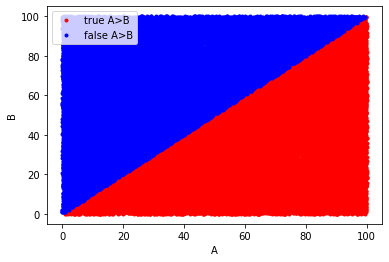

In [3]:
# plotando os dados para enxergar graficamente
xtrue = np.ndarray(shape=(0,2)) # dimensão 0 (linhas), 2 (colunas)
xfalse = np.ndarray(shape=(0,2))
for i in range(60000): #de 0 a 999
    if y[i]:
        xtrue = np.append(xtrue, [x_train[i,:]], axis=0)
    else:
        xfalse = np.append(xfalse, [x_train[i,:]], axis=0)

plt.plot(xtrue[:,0], xtrue[:,1], "r.", label="true A>B")
plt.plot(xfalse[:,0], xfalse[:,1], "b.", label="false A>B")
plt.xlabel("A")
plt.ylabel("B")
plt.legend()
plt.show()

In [4]:
# modelando a rede neural
model = tf.keras.models.Sequential(name="modelo_AmaiorqB")
model.add(tf.keras.Input(shape=(2,)))
model.add(tf.keras.layers.Dense(5,activation="sigmoid"))
model.add(tf.keras.layers.Dense(1,activation="sigmoid"))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.summary()

Model: "modelo_AmaiorqB"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(x_train, y_train, epochs=500, batch_size=15,steps_per_epoch=30)

Epoch 1/500
30/30 [==============================] - 1s 941us/step - loss: 0.2697 - mae: 0.5006
Epoch 2/500
30/30 [==============================] - 0s 862us/step - loss: 0.2671 - mae: 0.5001
Epoch 3/500
30/30 [==============================] - 0s 1ms/step - loss: 0.2607 - mae: 0.4962
Epoch 4/500
30/30 [==============================] - 0s 829us/step - loss: 0.2568 - mae: 0.4952
Epoch 5/500
30/30 [==============================] - 0s 898us/step - loss: 0.2440 - mae: 0.4847
Epoch 6/500
30/30 [==============================] - 0s 926us/step - loss: 0.2343 - mae: 0.4763
Epoch 7/500
30/30 [==============================] - 0s 1000us/step - loss: 0.2305 - mae: 0.4737
Epoch 8/500
30/30 [==============================] - 0s 965us/step - loss: 0.2157 - mae: 0.4585
Epoch 9/500
30/30 [==============================] - 0s 1ms/step - loss: 0.2091 - mae: 0.4520
Epoch 10/500
30/30 [==============================] - 0s 965us/step - loss: 0.2038 - mae: 0.4464
Epoch 11/500
30/30 [======================

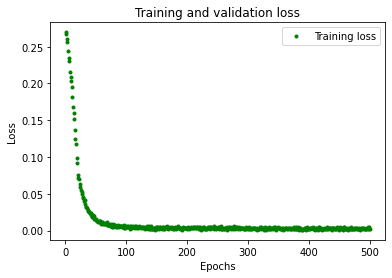

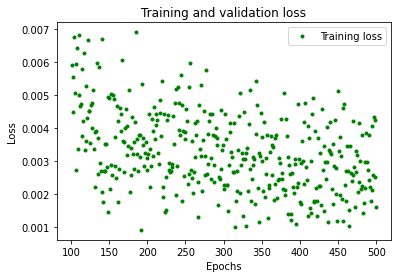

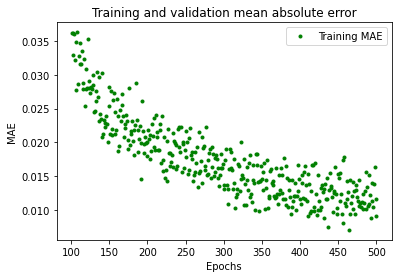

In [6]:
loss = history.history['loss']
# val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Exclude the first few epochs so the graph is easier to read
SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
# plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = history.history['mae']
# val_mae = history.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
# plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

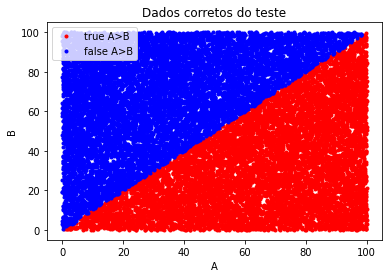

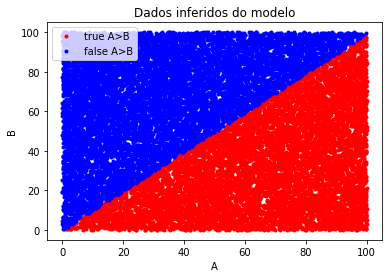

[[0.9963151 ]
 [0.0018459 ]
 [0.0018459 ]
 ...
 [0.00184584]
 [0.99632037]
 [0.99632037]]


In [7]:
xtrue = np.ndarray(shape=(0,2)) # dimensão 0 (linhas), 2 (colunas)
xfalse = np.ndarray(shape=(0,2))
for i in range(20000): #de 0 a 999
    if y_test[i]:
        xtrue = np.append(xtrue, [x_test[i,:]], axis=0)
    else:
        xfalse = np.append(xfalse, [x_test[i,:]], axis=0)
plt.plot(xtrue[:,0], xtrue[:,1], "r.", label="true A>B")
plt.plot(xfalse[:,0], xfalse[:,1], "b.", label="false A>B")
plt.xlabel("A")
plt.ylabel("B")
plt.legend()
plt.title('Dados corretos do teste')
plt.show()


# Use the model to make predictions from our validation data
predic = model.predict(x_test)
# Plot the predictions along with the test data
xtrue = np.ndarray(shape=(0,2)) # dimensão 0 (linhas), 2 (colunas)
xfalse = np.ndarray(shape=(0,2))
for i in range(20000): #de 0 a 999
    if predic[i]>0.5:
        xtrue = np.append(xtrue, [x_test[i,:]], axis=0)
    else:
        xfalse = np.append(xfalse, [x_test[i,:]], axis=0)

plt.title('Dados inferidos do modelo')
plt.plot(xtrue[:,0], xtrue[:,1], "r.", label="true A>B")
plt.plot(xfalse[:,0], xfalse[:,1], "b.", label="false A>B")
plt.xlabel("A")
plt.ylabel("B")
plt.legend()
plt.show()
print(predic)